<h1>Japanese Restaurants</h1>
<h2>Explore Locations</h2>
<p>
   What do you have to do in this weekely assignment:
<ul>
    <li>Load the data <i>air_store_info.csv</i>,<i>hpg_store_info.csv</i>,<i>store_id_relation.csv</i> </li>
    <li>Test: do we need the hpg_store_info.csv? </li>
    <li>Show the locations (latitude-longitude coordinates) of restaruants in a scatter plot </li>
    <li>Verify how many unique restaurants and locations we have. Keep in mind that the provided localisations are only approximations of the true locations.</li>
    <li>Group restaurants (make clusters) of restaurants using k-means</li>
    <li>Show the lat-lon plot with colored clusters</li>
    <li>Zoom in on some areas where we have some dense 'blobs'</li>
    <li>Add an extra column containing a cluster-number to the table of restaurant information</li>
    <li>Save the table to a csv file</li>
</ul>
</p>
Good luck!

In [1]:
%matplotlib inline
import pandas as pd

<h2>Load the data</h2>
<ul>
<li>HPG restaurant information <i>hpg_store_info.csv</i></li>
<li>AIR restaurant information <i>air_store_info.csv</i></li> 
<li>Mapping between HPG and AIR id-s <i>store_id_relation.csv</i></li>
</ul>

In [2]:
#path='../data/'
path = "C:/Users/snijd507/Documents/Python Scripts/Kaggle Restaurant Case/Data/"
airstore_info=pd.read_csv(path+'air_store_info.csv')
hpgstore_info=pd.read_csv(path+'hpg_store_info.csv')
store_id_relation=pd.read_csv(path+'store_id_relation.csv')

<ul><li>Show the number of rows and columnbs in these tables</li></ul>

In [3]:
print("air-store_info",airstore_info.shape)
print("hpg-store_info",hpgstore_info.shape)
print("store_id_relation",store_id_relation.shape)

air-store_info (829, 5)
hpg-store_info (4690, 5)
store_id_relation (150, 2)


<ul><li>Show the tables (heads)</li></ul>

In [4]:
airstore_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


<h2>Test: do we need the hpg_store_info.csv? </h2>
<p>
Remember that restaurant reservations can be made via the <i>AIR</i> reservation system, but also via the
<i>HPG</i> reservation system. <br/> 
Therefore, for restaurant information, we have both, HPG restaurant locations in the file <i>hpg_store_info.csv</i> and AIR restaurant info in the <i>air_store_info.csv</i> file. 
Theoretically, we might have HPG store information which refers to an AIR restaurant, but which does not appear in the AIR restaurant store information.<br/>
Let us check that, before we continue with the lat-lon data.<br/> 
We will use the <i>store_id_relation.csv</i> file. This file contains both ID's  HPG restaurant-id's and AIR restaurant-ids'. <br/>
</p>
<p>
ps: In the next section, when we will have a look at the reservations data, we will use this <i>store_id_relation.csv<i> also, and   filter out the AIR reservations. 
    </p>

In [5]:
unique_stores_air = airstore_info['air_store_id'].unique()
unique_stores_hpg = hpgstore_info['hpg_store_id'].unique()
print("unique stores air",len(unique_stores_air))
print("unique stores hpg",len(unique_stores_hpg))
store_info = pd.merge(hpgstore_info, store_id_relation, how='inner', on=['hpg_store_id'])
print("hpg-store_info with a air-store-id",store_info.shape)
temp_merged_hpg_data= pd.merge(airstore_info, store_info, how='left', on=['air_store_id'])
print("unique stores air after merge:",len(temp_merged_hpg_data['air_store_id'].unique()))

unique stores air 829
unique stores hpg 4690
hpg-store_info with a air-store-id (63, 6)
unique stores air after merge: 829


Ok, checked<p>So, no, we don't have to use hpg store information for locations (add data to air data) for visualisation
  (we must do to include reservations however, but that will be done later)<p> 

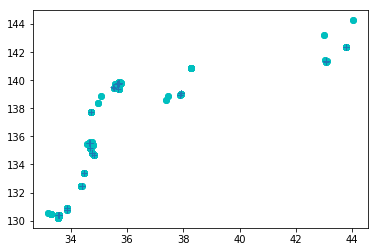

In [6]:
import matplotlib.pyplot as plt
plt.plot(airstore_info.latitude, airstore_info.longitude,'co')
plt.plot(store_info.latitude, store_info.longitude,'+')

<h1>K-Means Clustering</h1>

In [7]:
from sklearn.cluster import KMeans
X =airstore_info[['air_store_id','latitude','longitude']] 
X.head()

,air_store_id,latitude,longitude
0,air_0f0cdeee6c9bf3d7,34.695124,135.197852
1,air_7cc17a324ae5c7dc,34.695124,135.197852
2,air_fee8dcf4d619598e,34.695124,135.197852
3,air_a17f0778617c76e2,34.695124,135.197852
4,air_83db5aff8f50478e,35.658068,139.751599


<h2>Note that some restaurants have the same lat-lon, because the lat-lon is form the AREA, not from the building</h2>


In [8]:
temp=airstore_info.latitude+airstore_info.longitude
n=len(temp.unique())
print("only ",n," unique locations")

only  108  unique locations


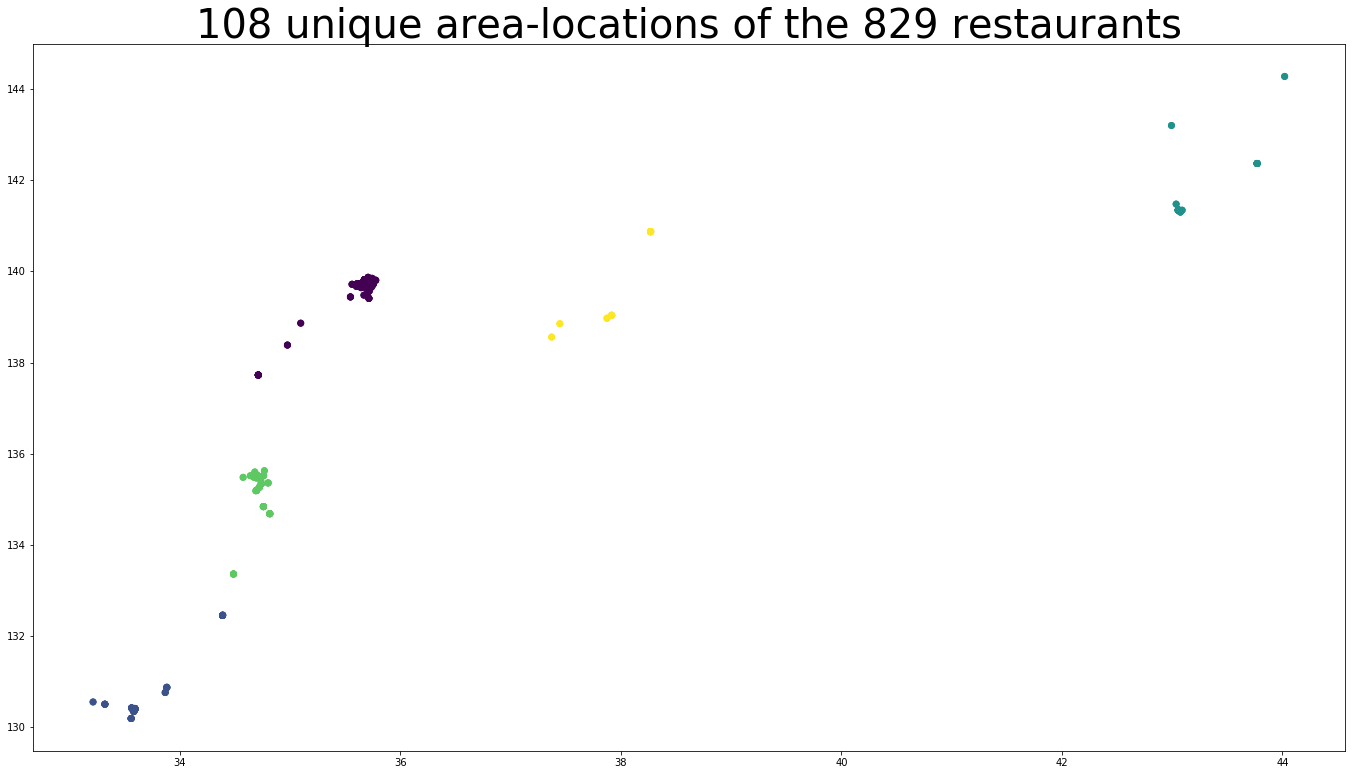

In [10]:
X =airstore_info[['latitude','longitude']] 
k_means=KMeans(n_clusters=5,random_state=0)
k_means.fit(X)
cluster_values=k_means.predict(X)
fig = plt.figure(figsize=(23.5, 13.0)) 
plt.title(str(n)+" unique area-locations of the "+str(len(X))+" restaurants",size=40)
plt.scatter(X.latitude,X.longitude,c=cluster_values)

By selecting some subset of the coordinates we can better see what's in some the blob...

In [11]:
Xzoom=X[X.latitude>34]
Xzoom=X[X.latitude<36]
Xzoom=Xzoom[Xzoom.longitude<143]
Xzoom=Xzoom[Xzoom.longitude>134]

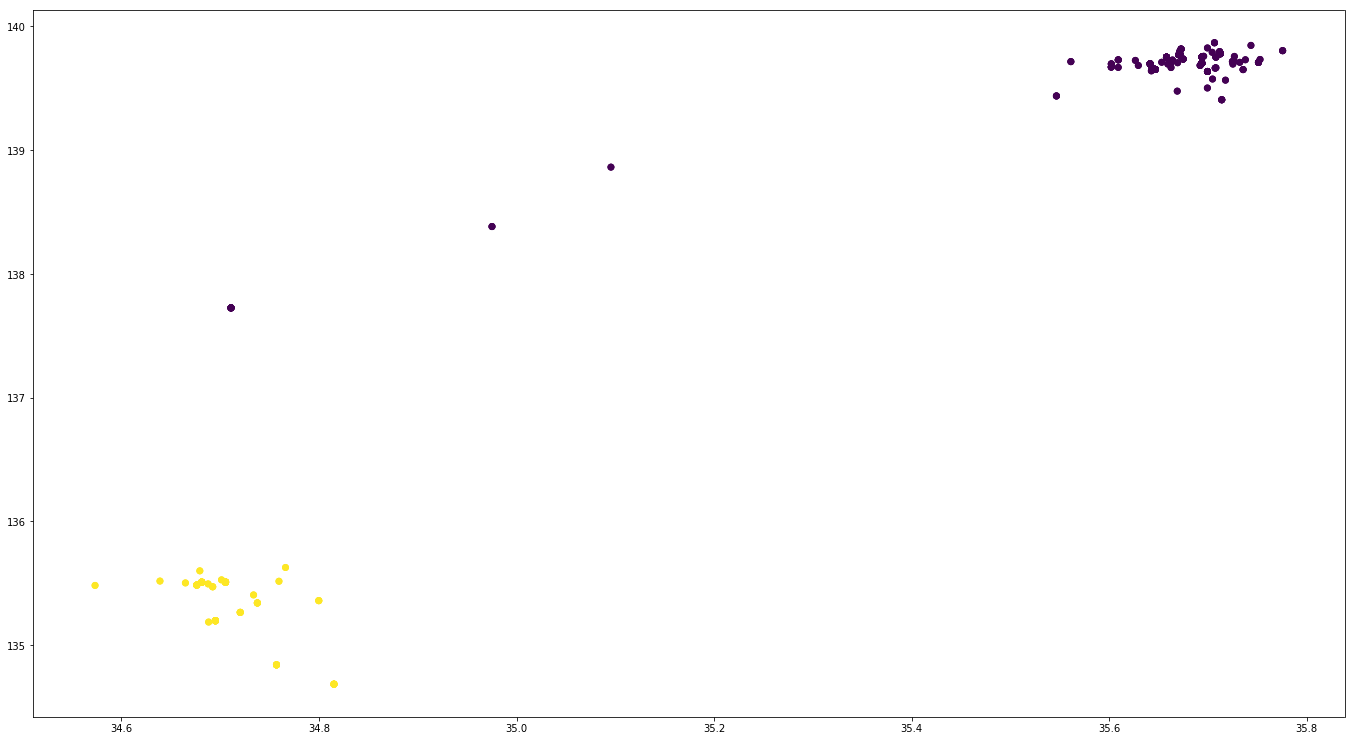

In [12]:
cluster_values_zoom=k_means.predict(Xzoom)
fig = plt.figure(figsize=(23.5, 13.0)) 
plt.scatter(Xzoom.latitude,Xzoom.longitude,c=cluster_values_zoom)

Add the column with the cluster number to the dataset and save it to csv

In [13]:
airstore_info['cluster']=cluster_values

In [14]:
airstore_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,cluster
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0


In [15]:
airstore_info.to_csv("../data/clusters.csv",sep=";")

FileNotFoundError: [Errno 2] No such file or directory: '../data/clusters.csv'